In [22]:


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [23]:
#importing data 

train_df = pd.read_csv("data/train.csv", parse_dates = ['date'])
test_df  = pd.read_csv("data/test.csv",parse_dates = ['date'])
stores_df  = pd.read_csv("data/stores.csv")
oil_df  = pd.read_csv("data/oil.csv",parse_dates = ['date'])
holidays_events_df  = pd.read_csv("data/holidays_events.csv",parse_dates = ['date'])
transactions_df  = pd.read_csv("data/transactions.csv",parse_dates = ['date'])
sample_submission_df = pd.read_csv("data/sample_submission.csv")

In [24]:
display(train_df.head())
display(test_df.head())
display(stores_df.head())
display(oil_df.head())
display(holidays_events_df.head())
display(transactions_df.head())
display(sample_submission_df.head())



id       date  store_nbr      family  sales  onpromotion
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0
1   1 2013-01-01          1   BABY CARE    0.0            0
2   2 2013-01-01          1      BEAUTY    0.0            0
3   3 2013-01-01          1   BEVERAGES    0.0            0
4   4 2013-01-01          1       BOOKS    0.0            0

id       date  store_nbr      family  onpromotion
0  3000888 2017-08-16          1  AUTOMOTIVE            0
1  3000889 2017-08-16          1   BABY CARE            0
2  3000890 2017-08-16          1      BEAUTY            2
3  3000891 2017-08-16          1   BEVERAGES           20
4  3000892 2017-08-16          1       BOOKS            0

store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4

date  dcoilwtico
0 2013-01-01         NaN
1 2013-01-02       93.14
2 2013-01-03       92.97
3 2013-01-04       93.12
4 2013-01-07       93.20

date     type    locale locale_name                    description  \
0 2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1 2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2 2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3 2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4 2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False

date  store_nbr  transactions
0 2013-01-01         25           770
1 2013-01-02          1          2111
2 2013-01-02          2          2358
3 2013-01-02          3          3487
4 2013-01-02          4          1922

id  sales
0  3000888    0.0
1  3000889    0.0
2  3000890    0.0
3  3000891    0.0
4  3000892    0.0

In [25]:
train_df.info()
train_df.describe()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 137.4+ MB


id                           date     store_nbr  \
count  3.000888e+06                        3000888  3.000888e+06   
mean   1.500444e+06  2015-04-24 08:27:04.703088384  2.750000e+01   
min    0.000000e+00            2013-01-01 00:00:00  1.000000e+00   
25%    7.502218e+05            2014-02-26 18:00:00  1.400000e+01   
50%    1.500444e+06            2015-04-24 12:00:00  2.750000e+01   
75%    2.250665e+06            2016-06-19 06:00:00  4.100000e+01   
max    3.000887e+06            2017-08-15 00:00:00  5.400000e+01   
std    8.662819e+05                            NaN  1.558579e+01   

              sales   onpromotion  
count  3.000888e+06  3.000888e+06  
mean   3.577757e+02  2.602770e+00  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  
50%    1.100000e+01  0.000000e+00  
75%    1.958473e+02  0.000000e+00  
max    1.247170e+05  7.410000e+02  
std    1.101998e+03  1.221888e+01

In [26]:
#oil_df dataframe has 43 NaN values

nan_sum_per_column = {}
for column in oil_df.columns:
    nan_count = oil_df[column].isna().sum()
    if nan_count > 0:
        nan_sum_per_column[column] = nan_count

# Print the results
if nan_sum_per_column:
    print("Columns with NaN values and their corresponding NaN sums:")
    for column, nan_count in nan_sum_per_column.items():
        print(f"Column '{column}': {nan_count} NaN values")
else:
    print("No NaN values found in any column.")

Columns with NaN values and their corresponding NaN sums:
Column 'dcoilwtico': 43 NaN values


In [27]:
#We use interpolation method to fill the nan values. Method 'bfill' guarantees that the 1st row value changes aswell.
#Then, we check that all nan values have been replaced.

oil_df_interpolated = oil_df.interpolate(method='linear').fillna(method='bfill')

nan_sum_per_column = {}
for column in oil_df_interpolated.columns:
    nan_count = oil_df_interpolated[column].isna().sum()
    if nan_count > 0:
        nan_sum_per_column[column] = nan_count

# Print the results
if nan_sum_per_column:
    print("Columns with NaN values and their corresponding NaN sums:")
    for column, nan_count in nan_sum_per_column.items():
        print(f"Column '{column}': {nan_count} NaN values")
else:
    print("No NaN values found in any column.")

No NaN values found in any column.


In [28]:
oil_df_interpolated['day_of_week'] = oil_df_interpolated['date'].dt.day_of_week
oil_df_interpolated['day_of_week'].unique()

array([1, 2, 3, 4, 0])

In [29]:
#extracting day, year, month from date

train_df['year'] = pd.to_datetime(train_df['date']).dt.year
train_df['quarter'] = pd.to_datetime(train_df['date']).dt.quarter
train_df['month'] = pd.to_datetime(train_df['date']).dt.month
train_df['day'] = pd.to_datetime(train_df['date']).dt.day
train_df['day_of_week'] = train_df['date'].dt.day_of_week
train_df['day_name'] = pd.to_datetime(train_df['date']).dt.day_name()

print(train_df.head(5))
print(train_df.info(15))

   id       date  store_nbr      family  sales  onpromotion  year  quarter  \
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0  2013        1   
1   1 2013-01-01          1   BABY CARE    0.0            0  2013        1   
2   2 2013-01-01          1      BEAUTY    0.0            0  2013        1   
3   3 2013-01-01          1   BEVERAGES    0.0            0  2013        1   
4   4 2013-01-01          1       BOOKS    0.0            0  2013        1   

   month  day  day_of_week day_name  
0      1    1            1  Tuesday  
1      1    1            1  Tuesday  
2      1    1            1  Tuesday  
3      1    1            1  Tuesday  
4      1    1            1  Tuesday  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 12 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object 

                                                    ###VISUALIZATION###

date_feature


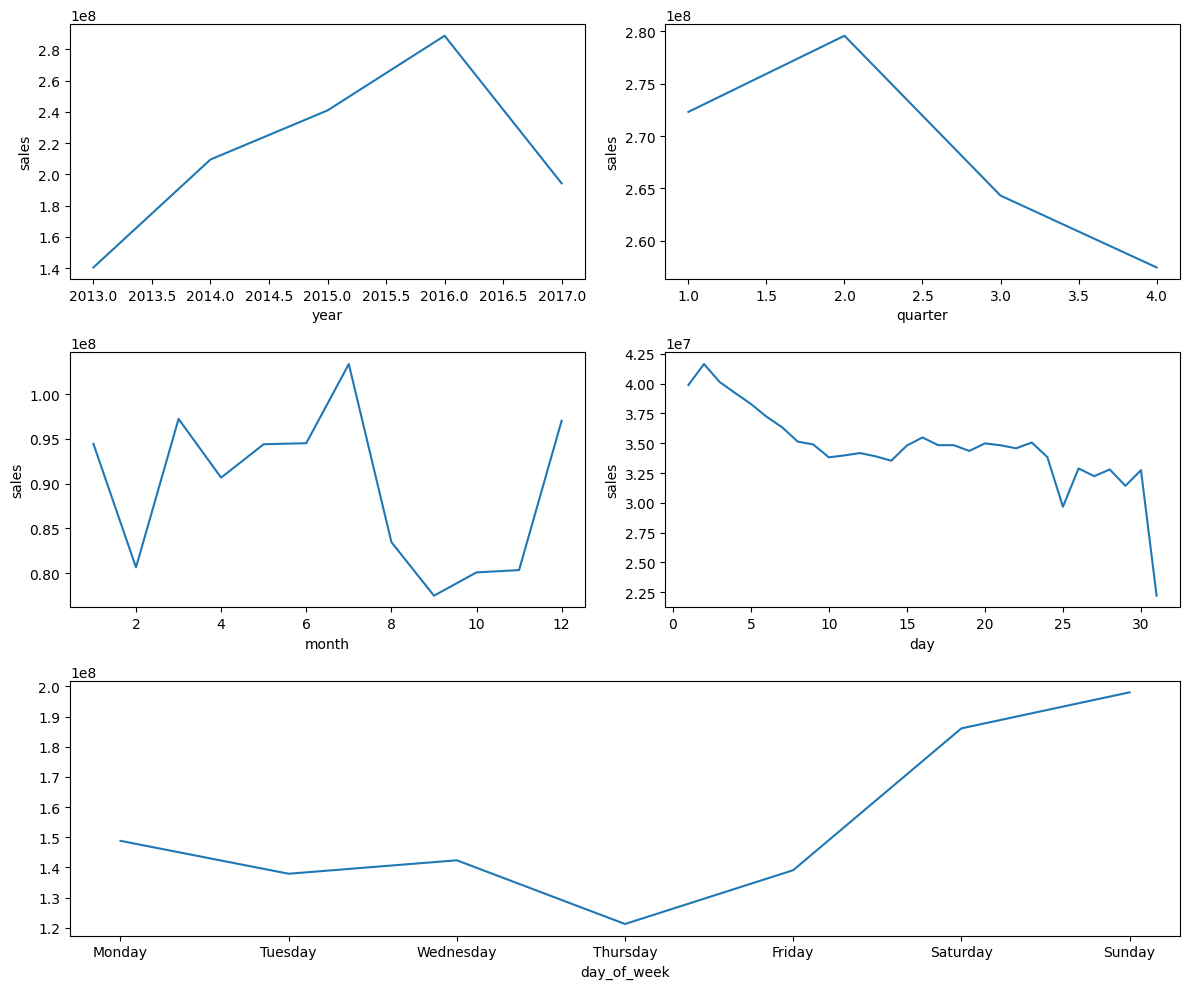

In [30]:
intervals = ['year','quarter', 'month', 'day','day_of_week']

fig = plt.figure(figsize=(12,10))

gs = fig.add_gridspec(3,2)

for ind, column in enumerate(intervals[:-1]):
    intervals_grouped = train_df.groupby(column)['sales'].sum()
    intervals_grouped = pd.DataFrame(intervals_grouped).reset_index()
    ax = fig.add_subplot(gs[ind])

    sns.lineplot(data=intervals_grouped, x=column, y='sales', ax=ax)

dayofweek = train_df[['day_of_week','sales']].groupby('day_of_week').sum()
dayofweek.rename(index={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'},inplace=True)
ax = fig.add_subplot(gs[-2:])
sns.lineplot(x=dayofweek.index,y=dayofweek.values.flatten(),ax=ax)

plt.tight_layout()
plt.show()

oil_price

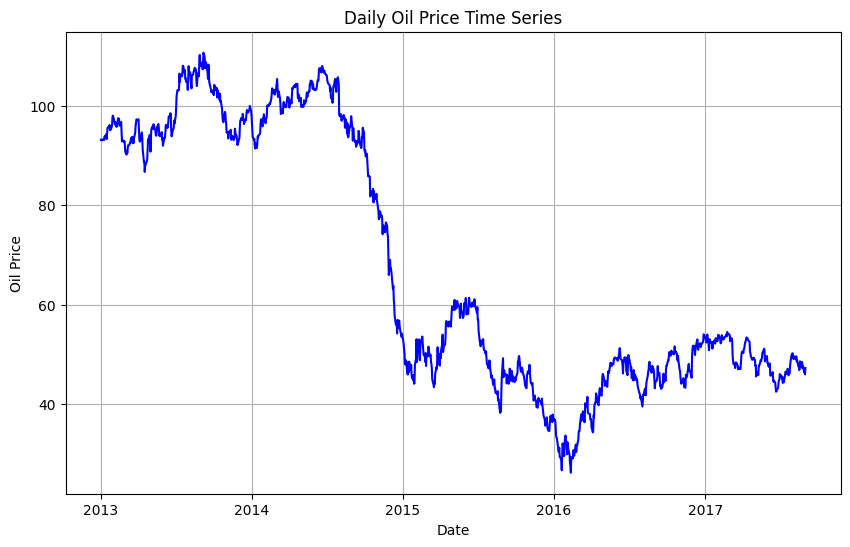

In [31]:
#Plot daily oil price as a time series

oil_df_interpolated.set_index('date', inplace=True)
#oil_df_interpolated.index = pd.DatetimeIndex(oil_df_interpolated.index)

plt.figure(figsize=(10, 6))
plt.plot(oil_df_interpolated['dcoilwtico'], color='blue')
plt.title("Daily Oil Price Time Series")
plt.xlabel("Date")
plt.ylabel("Oil Price")
plt.grid(True)

years = oil_df_interpolated.index.year
# Set the x-axis ticks to display years
plt.xticks(ticks=pd.to_datetime(['2013-01-01', '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01']), 
           labels=[2013, 2014, 2015, 2016, 2017])


plt.show()


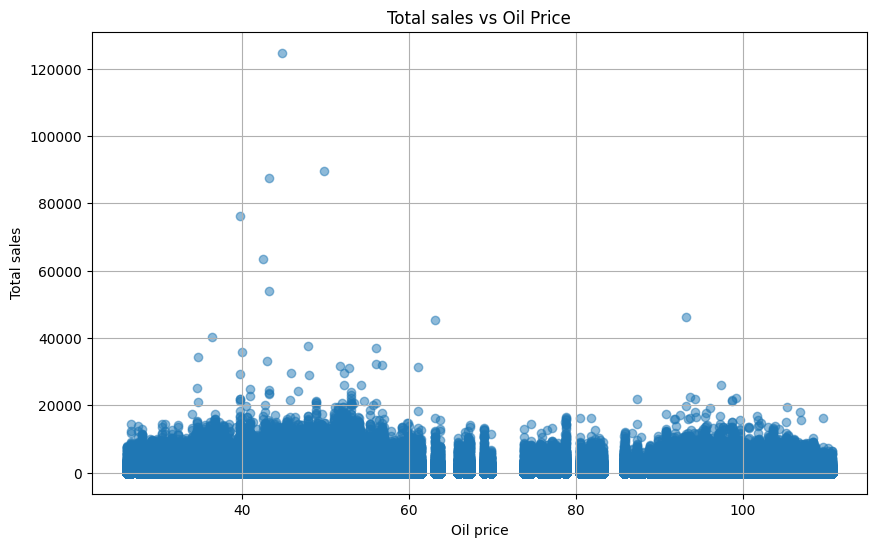

In [32]:
merged_df = pd.merge(train_df, oil_df_interpolated, on='date', how='left')

plt.figure(figsize=(10,6))
plt.scatter(merged_df['dcoilwtico'], merged_df['sales'], alpha = 0.5)
plt.title("Total sales vs Oil Price")
plt.xlabel("Oil price")
plt.ylabel("Total sales")
plt.grid(True)
plt.show()

store_nbr

In [33]:
#store_nbr 1 sales on training set

import plotly.express as px
fig = px.scatter(train_df[train_df.store_nbr==1], x="date", y="sales")
fig.show()

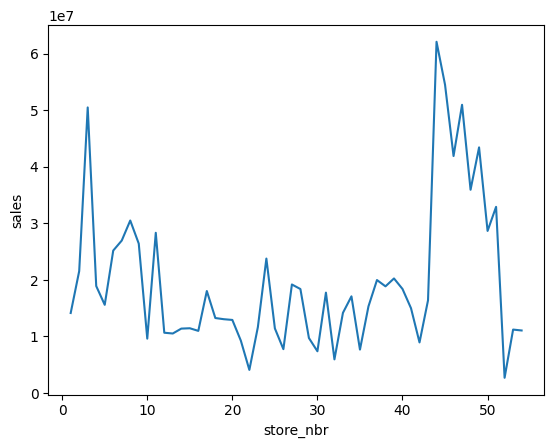

store_nbr         sales
0          1  1.414501e+07
1          2  2.155739e+07
2          3  5.048191e+07
3          4  1.890970e+07

In [34]:
#sum of sales for all store_nbr

data1 = train_df.groupby('store_nbr')['sales'].sum().reset_index()

sns.lineplot(data = data1, x = "store_nbr", y = "sales")
plt.show()

data1[0:4]



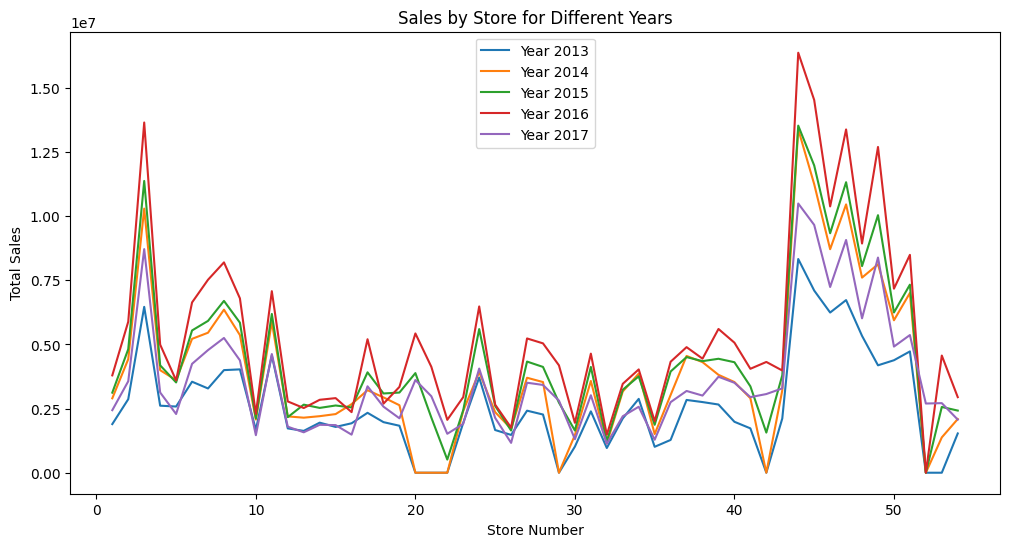

Top 5 stores for Year 2013:
    year  store_nbr         sales
43  2013         44  8.327322e+06
44  2013         45  7.098806e+06
46  2013         47  6.727160e+06
2   2013          3  6.462661e+06
45  2013         46  6.241695e+06

Top 5 stores for Year 2014:
     year  store_nbr         sales
97   2014         44  1.338021e+07
98   2014         45  1.124571e+07
100  2014         47  1.045526e+07
56   2014          3  1.029116e+07
99   2014         46  8.709583e+06

Top 5 stores for Year 2015:
     year  store_nbr         sales
151  2015         44  1.352443e+07
152  2015         45  1.197348e+07
110  2015          3  1.136922e+07
154  2015         47  1.132002e+07
156  2015         49  1.003530e+07

Top 5 stores for Year 2016:
     year  store_nbr         sales
205  2016         44  1.636547e+07
206  2016         45  1.452409e+07
164  2016          3  1.364653e+07
208  2016         47  1.337675e+07
210  2016         49  1.269275e+07

Top 5 stores for Year 2017:
     year  store_nbr  

In [35]:
#plotting sum of sales for each store_nbr for every year between 2013-2017
#printing store_nbr for stores with the biggest sum of sales 

# Calculate the sum of sales by store and year
summed = train_df.groupby(['year', 'store_nbr'])['sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
ax = plt.gca()
top_stores_dict = {}

for year in train_df.year.unique():
    data_yearly = summed[summed['year']==year]
    sns.lineplot(data=data_yearly, x="store_nbr", y="sales", label=f"Year {year}", ax=ax)

    #top 5 stores for current year
    top_stores = data_yearly.sort_values(by='sales', ascending=False).head(5)
    top_stores_dict[year] = top_stores


plt.title("Sales by Store for Different Years")
plt.xlabel("Store Number")
plt.ylabel("Total Sales")



plt.show()
for year, top_stores in top_stores_dict.items():
    print(f"Top 5 stores for Year {year}:\n{top_stores}\n")



Top 5 stores for promotions in Year 2013:
    store_nbr  onpromotion
0           1            0
40         41            0
29         30            0
30         31            0
31         32            0

Top 5 stores for promotions in Year 2014:
    store_nbr  onpromotion
5           6        14648
45         46        14247
47         48        14192
7           8        13918
2           3        13747

Top 5 stores for promotions in Year 2015:
    store_nbr  onpromotion
45         46        32087
47         48        31704
46         47        31367
44         45        29997
48         49        29462

Top 5 stores for promotions in Year 2016:
    store_nbr  onpromotion
52         53       125225
43         44        87937
44         45        86028
46         47        85680
45         46        83150

Top 5 stores for promotions in Year 2017:
    store_nbr  onpromotion
8           9        63999
10         11        63630
43         44        62435
46         47        62200
44 

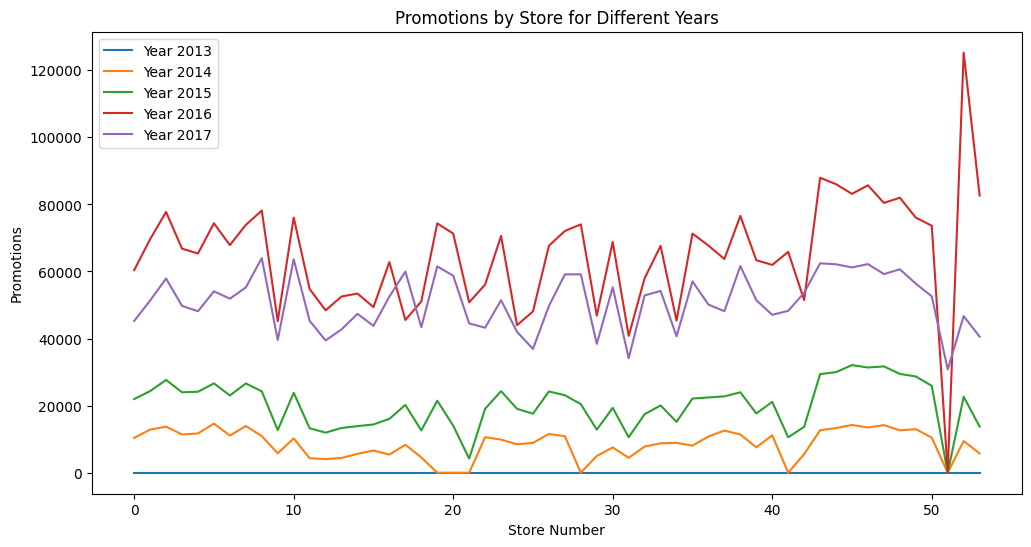

In [36]:
#Plotting total number of promotions for each store_nbr for every year between 2013-2016
#Printing store_nbr for stores with the biggest number of promotions


plt.figure(figsize=(12, 6))
ax = plt.gca()

promotions_by_year = pd.DataFrame()

for year in range(2013, 2018):
    data_yearly = train_df[train_df['year'] == year].groupby('store_nbr')['onpromotion'].sum().reset_index()
    promotions_by_year[f'Year {year}'] = data_yearly['onpromotion']
    
    # Get top 5 stores for promotions for the current year
    top_stores = data_yearly.sort_values(by='onpromotion', ascending=False).head(5)
    print(f"Top 5 stores for promotions in Year {year}:\n{top_stores}\n")


sns.lineplot(data=promotions_by_year, dashes=False, ax=ax)


plt.title("Promotions by Store for Different Years")
plt.xlabel("Store Number")
plt.ylabel("Promotions")
plt.legend(loc='upper left') 

plt.show()

In [37]:
# store_nbr for every store cluster 

cluster_stores = stores_df.groupby('cluster')['store_nbr'].apply(list)
print(cluster_stores)

cluster
1                     [24, 25, 27]
2                         [37, 42]
3     [16, 30, 32, 33, 35, 40, 54]
4                      [5, 38, 41]
5                             [44]
6          [9, 11, 20, 21, 34, 39]
7                         [14, 22]
8                        [3, 7, 8]
9                          [4, 23]
10        [26, 28, 29, 31, 36, 43]
11                    [45, 49, 52]
12                            [17]
13                   [1, 2, 6, 53]
14                [46, 47, 48, 50]
15            [10, 12, 13, 15, 19]
16                            [18]
17                            [51]
Name: store_nbr, dtype: object


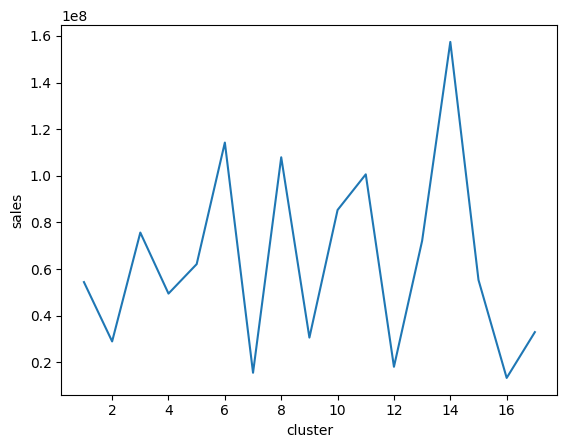

In [38]:
#merge train_df with stores_df based on store_nbr to plot total sales per store cluster 

merged_df = train_df.merge(stores_df, on = 'store_nbr')
cluster_sales = merged_df.groupby('cluster')['sales'].sum().reset_index()

sns.lineplot(data = cluster_sales, x ="cluster", y = "sales")
plt.show()

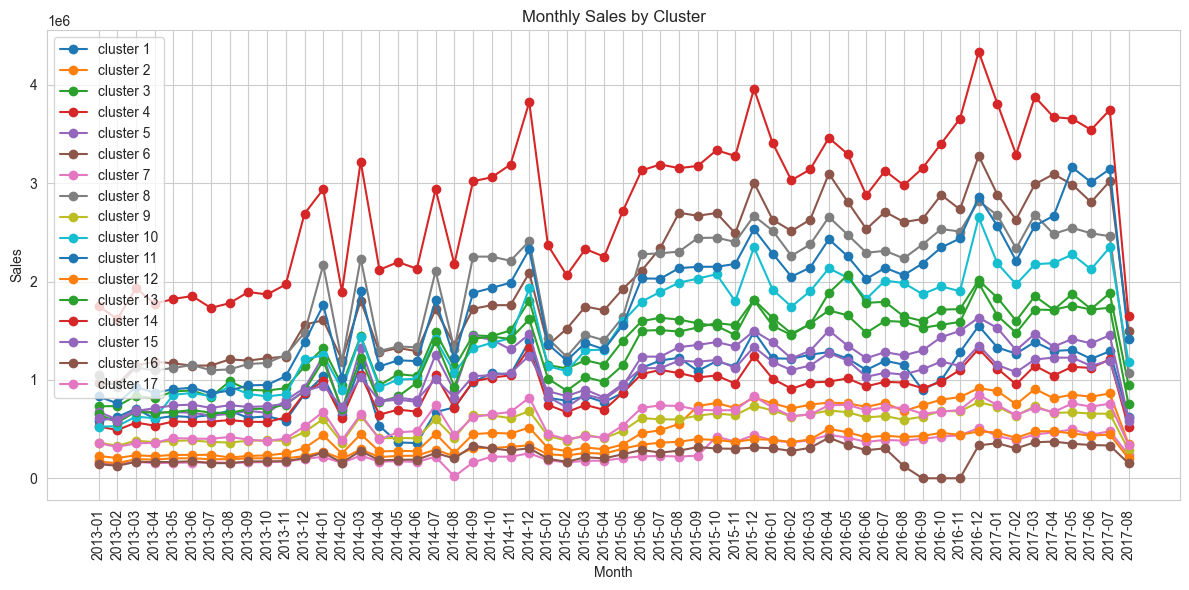

In [39]:
#plotting total sales per store cluster in a single graph as a time series 2013-2017 (monthly)


merged_df['date'] = pd.to_datetime(merged_df['date'])
merged_df['month'] = merged_df['date'].dt.strftime('%Y-%m')

cluster_monthly_sales = merged_df.groupby(['cluster', 'month'])['sales'].sum().reset_index()

sns.set_style('whitegrid')
plt.figure(figsize=(12, 6))

for cluster, group in cluster_monthly_sales.groupby('cluster'):
    plt.plot(group['month'], group['sales'], label=f'cluster {cluster}', marker='o')


plt.title('Monthly Sales by Cluster')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Family of products

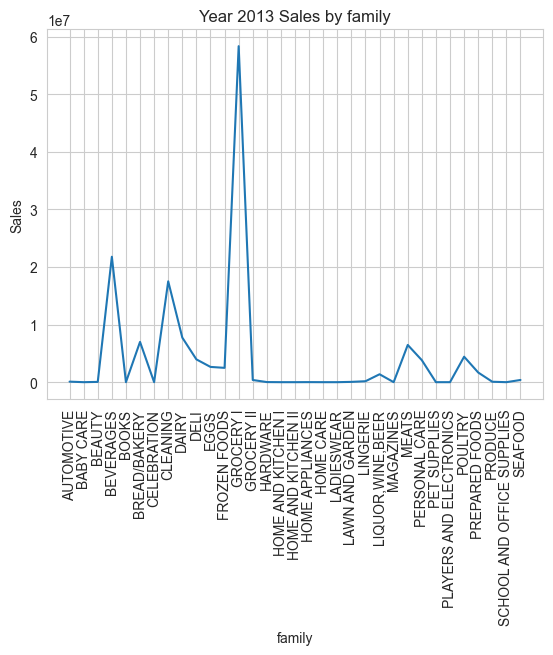

          family         sales
12     GROCERY I  5.833993e+07
3      BEVERAGES  2.177788e+07
7       CLEANING  1.751452e+07
8          DAIRY  7.738893e+06
5   BREAD/BAKERY  6.992152e+06


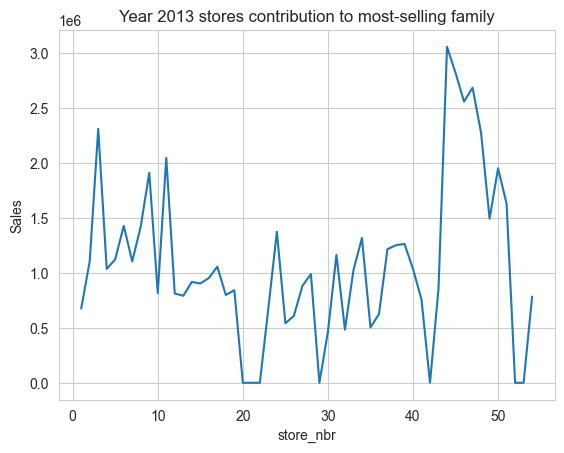

    store_nbr      sales
43         44  3056726.0
44         45  2819464.0
46         47  2684752.0
45         46  2557741.0
2           3  2310170.0


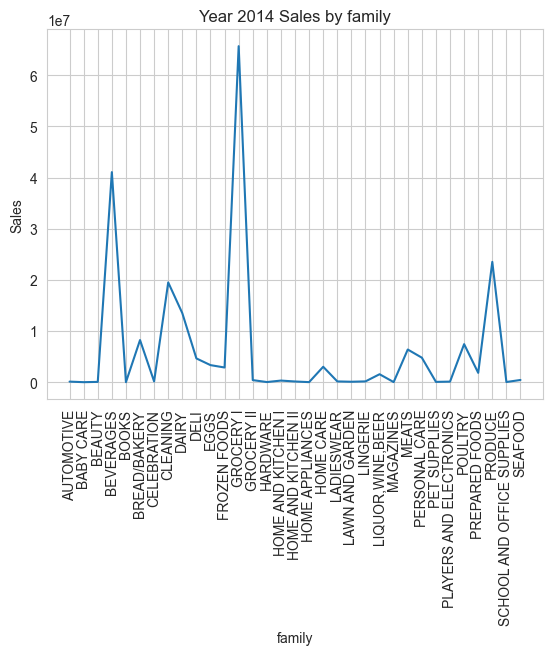

       family         sales
12  GROCERY I  6.566679e+07
3   BEVERAGES  4.105043e+07
30    PRODUCE  2.351253e+07
7    CLEANING  1.949760e+07
8       DAIRY  1.349178e+07


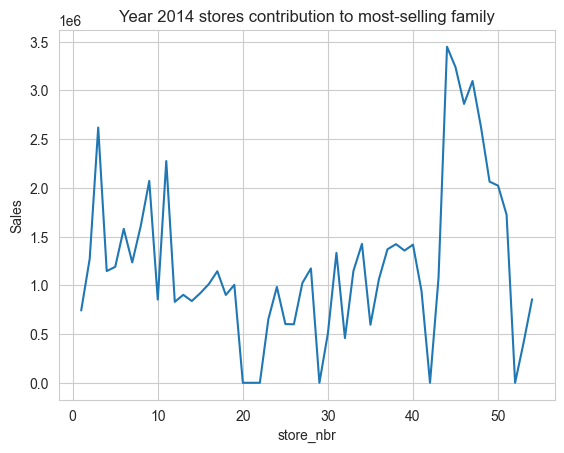

    store_nbr      sales
43         44  3448473.0
44         45  3238501.0
46         47  3097301.0
45         46  2862184.0
47         48  2620253.0


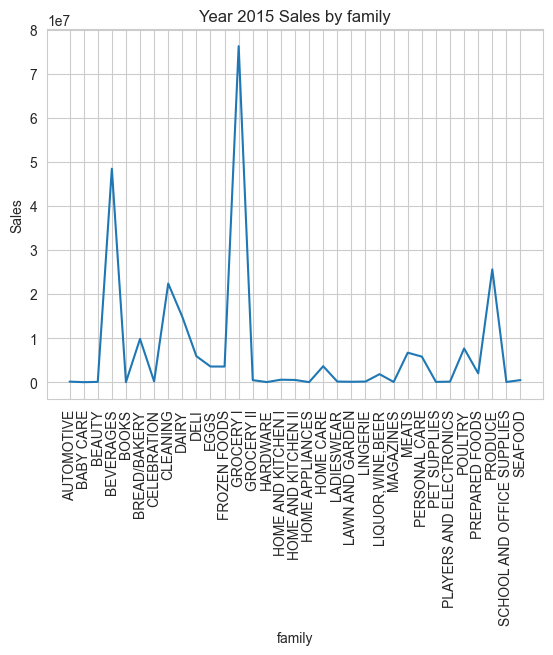

       family         sales
12  GROCERY I  7.622854e+07
3   BEVERAGES  4.842590e+07
30    PRODUCE  2.559584e+07
7    CLEANING  2.238143e+07
8       DAIRY  1.483414e+07


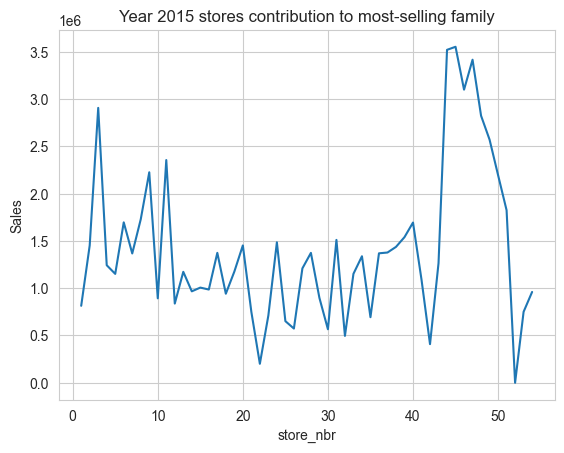

    store_nbr        sales
44         45  3551597.935
43         44  3519265.038
46         47  3414851.490
45         46  3098494.000
2           3  2905748.520


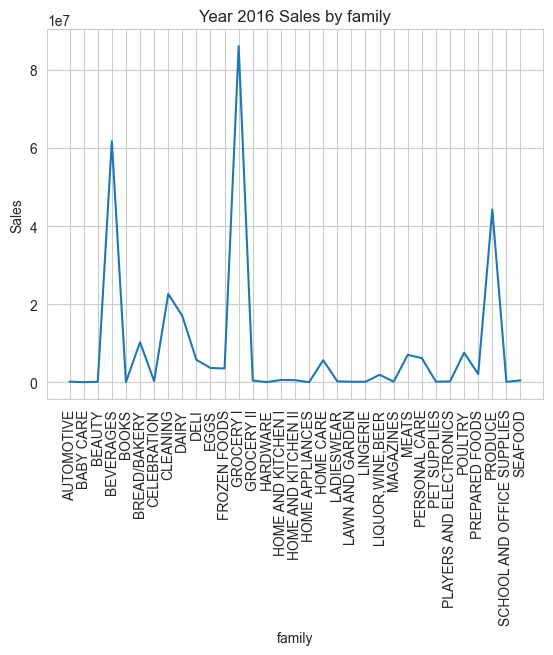

       family         sales
12  GROCERY I  8.608654e+07
3   BEVERAGES  6.174769e+07
30    PRODUCE  4.424810e+07
7    CLEANING  2.262893e+07
8       DAIRY  1.696719e+07


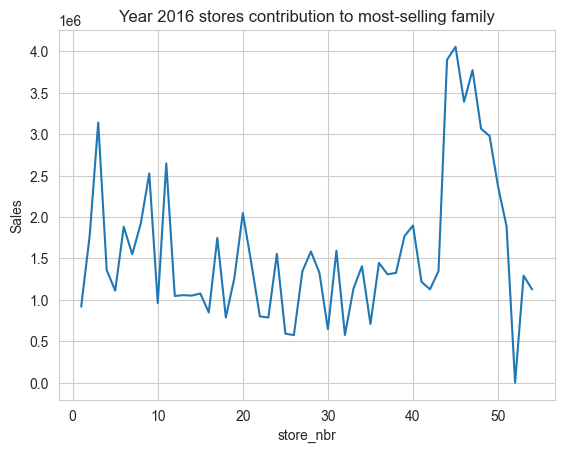

    store_nbr        sales
44         45  4054549.356
43         44  3897036.000
46         47  3772779.000
45         46  3390542.000
2           3  3140583.451


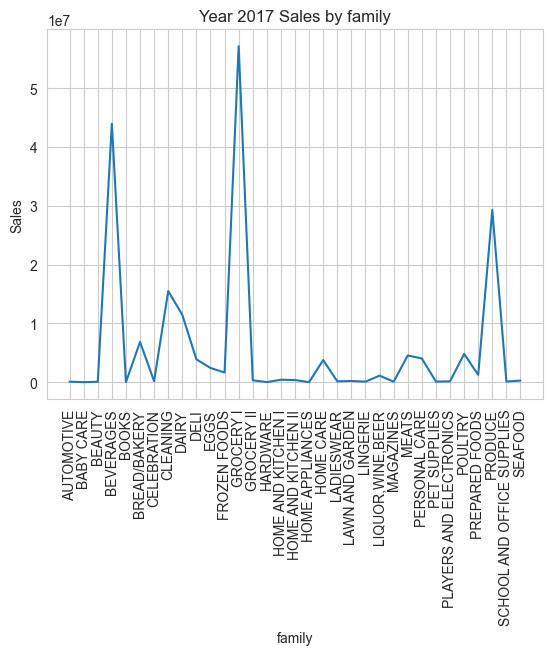

       family         sales
12  GROCERY I  5.714094e+07
3   BEVERAGES  4.395259e+07
30    PRODUCE  2.927541e+07
7    CLEANING  1.549882e+07
8       DAIRY  1.145570e+07


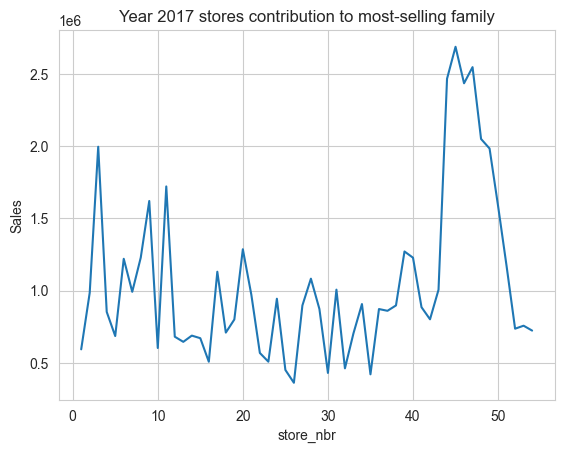

    store_nbr      sales
44         45  2685639.0
46         47  2544845.0
43         44  2464555.0
45         46  2433301.0
47         48  2048245.0


In [40]:
#plotted sales for each family of products for every year 2013-2016
#find the most selling family and the stores that contributed the most to this most-selling family(shop top 5).

for i in range(2013, 2018): 
    data_yearly = train_df[train_df['year'] == i].groupby('family')['sales'].sum().reset_index()
    sns.lineplot(data=data_yearly, x="family", y="sales")
    ax = plt.gca()
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.title(f"Year {i} Sales by family")
    plt.xlabel("family")
    plt.ylabel("Sales")
    plt.show()
    
    
    
    data_yearly_sorted = data_yearly.sort_values(by = "sales", ascending = False)
    print(data_yearly_sorted.head())
    best_family_sales = data_yearly_sorted.iloc[0,0]
    stores_contributed = train_df[(train_df['family']==best_family_sales) & (train_df['year'] == i)].groupby('store_nbr')['sales'].sum().reset_index()
    stores_contributed_sorted = stores_contributed.sort_values(by = "sales", ascending = False)
    sns.lineplot(data = stores_contributed, x = "store_nbr", y="sales")
    plt.title(f"Year {i} stores contribution to most-selling family")
    plt.xlabel("store_nbr")
    plt.ylabel("Sales")
    plt.show()
    print (stores_contributed_sorted.head())
    
 
    

Preparing for Lasso regression


In [41]:
train_oil_df = pd.merge(train_df, oil_df_interpolated, on='date', how='left')

nan_dates = train_oil_df[train_oil_df['dcoilwtico'].isna()]['date']
nan_day_of_week = nan_dates.dt.day_name()
day_of_week_counts = nan_day_of_week.value_counts()
print(day_of_week_counts)
print(day_of_week_counts.sum())

date
Saturday    429462
Sunday      427680
Name: count, dtype: int64
857142


In [42]:
#ffill for NaN values, check for other ways and compare 

train_oil_df['dcoilwtico'] = train_oil_df['dcoilwtico'].fillna(method = 'ffill')

In [43]:
holidays_events_df['locale'].unique()

array(['Local', 'Regional', 'National'], dtype=object)

In [44]:
#look at function name

def transform_str_to_num(data, column_mappings):
    for column, mapping in column_mappings.items():
        if column in data.columns:
            data[column] = data[column].map(mapping)

    return data


In [45]:

holidays_events_df['locale_name'].unique()

array(['Manta', 'Cotopaxi', 'Cuenca', 'Libertad', 'Riobamba', 'Puyo',
       'Guaranda', 'Imbabura', 'Latacunga', 'Machala', 'Santo Domingo',
       'El Carmen', 'Cayambe', 'Esmeraldas', 'Ecuador', 'Ambato',
       'Ibarra', 'Quevedo', 'Santo Domingo de los Tsachilas',
       'Santa Elena', 'Quito', 'Loja', 'Salinas', 'Guayaquil'],
      dtype=object)

In [46]:
#holidays events transformation
column_mappings = {}
column_mappings = {
    'type': {'Holiday': 1, 'Transfer': 2, 'Additional': 3, 'Bridge': 4, 'Work Day': 5, 'Event': 6},
    'locale': {'Local': 1, 'Regional': 2, 'National': 3},
    'locale_name': {'Manta': 1, 'Cotopaxi': 2, 'Cuenca': 3, 'Libertad': 4, 'Riobamba': 5, 'Puyo': 6, 'Guaranda': 7, 'Imbabura': 8,
                    'Latacunga': 9, 'Machala': 10, 'Santo Domingo': 11, 'El Carmen': 12, 'Cayambe': 13, 'Esmeraldas': 14,
                    'Ecuador': 15, 'Ambato': 16, 'Ibarra': 17, 'Quevedo': 18, 'Santo Domingo de los Tsachilas': 19,
                    'Santa Elena': 20, 'Quito': 21, 'Loja': 22, 'Salinas': 23, 'Guayaquil': 24},
    'transferred': {False: 1, True: 2}                
}

holidays_events_df_transformed = transform_str_to_num(holidays_events_df, column_mappings)
holidays_events_df_transformed = holidays_events_df_transformed.drop('description', axis = 'columns')
holidays_events_df_transformed.head()


date  type  locale  locale_name  transferred
0 2012-03-02     1       1            1            1
1 2012-04-01     1       2            2            1
2 2012-04-12     1       1            3            1
3 2012-04-14     1       1            4            1
4 2012-04-21     1       1            5            1

In [47]:
#stores_df transformation

column_mappings = {}
column_mappings = {
    'city': {'Quito': 1, 'Santo Domingo': 2, 'Cayambe': 3, 'Latacunga': 4, 'Riobamba': 5, 'Ibarra': 6, 'Guaranda': 7, 'Puyo': 8,
             'Ambato': 9, 'Guayaquil': 10, 'Salinas': 11, 'Daule': 12, 'Babahoyo': 13, 'Quevedo': 14, 'Playas': 15, 'Libertad': 16,
             'Cuenca': 17, 'Loja': 18, 'Machala': 19, 'Esmeraldas': 20, 'Manta': 21, 'El Carmen': 22},
    'state': {'Pichincha': 1, 'Santo Domingo de los Tsachilas': 2, 'Cotopaxi': 3, 'Chimborazo': 4, 'Imbabura': 5, 'Bolivar': 6,
              'Pastaza': 7, 'Tungurahua': 8,  'Guayas': 9, 'Santa Elena': 10, 'Los Rios': 11, 'Azuay': 12, 'Loja': 13,
              'El Oro': 14, 'Esmeraldas': 15, 'Manabi': 16},
    'type': {'D': 1, 'B': 2, 'C': 3, 'E': 4, 'A': 5}
}

stores_df_transformed = transform_str_to_num(stores_df, column_mappings)
stores_df_transformed.head()

store_nbr  city  state  type  cluster
0          1     1      1     1       13
1          2     1      1     1       13
2          3     1      1     1        8
3          4     1      1     1        9
4          5     2      2     1        4

In [48]:
#train_df (family column) transformation
column_mappings = {}
column_mappings = {
    'family': {'AUTOMOTIVE': 1, 'BABY CARE': 2, 'BEAUTY': 3, 'BEVERAGES': 4, 'BOOKS': 5, 'BREAD/BAKERY': 6,
               'CELEBRATION': 7, 'CLEANING': 8, 'DAIRY': 9, 'DELI': 10, 'EGGS': 11, 'FROZEN FOODS': 12, 'GROCERY I': 13,
               'GROCERY II': 14, 'HARDWARE': 15, 'HOME AND KITCHEN I': 16, 'HOME AND KITCHEN II': 17, 'HOME APPLIANCES': 18,
               'HOME CARE': 19, 'LADIESWEAR': 20, 'LAWN AND GARDEN': 21, 'LINGERIE': 22, 'LIQUOR,WINE,BEER': 23,
               'MAGAZINES': 24, 'MEATS': 25, 'PERSONAL CARE': 26, 'PET SUPPLIES': 27, 'PLAYERS AND ELECTRONICS': 28, 
               'POULTRY': 29, 'PREPARED FOODS': 30, 'PRODUCE': 31, 'SCHOOL AND OFFICE SUPPLIES': 32, 'SEAFOOD': 33}
}

train_df_transformed = transform_str_to_num(train_df, column_mappings)
train_df_transformed.head()

id       date  store_nbr  family  sales  onpromotion  year  quarter  month  \
0   0 2013-01-01          1       1    0.0            0  2013        1      1   
1   1 2013-01-01          1       2    0.0            0  2013        1      1   
2   2 2013-01-01          1       3    0.0            0  2013        1      1   
3   3 2013-01-01          1       4    0.0            0  2013        1      1   
4   4 2013-01-01          1       5    0.0            0  2013        1      1   

   day  day_of_week day_name  
0    1            1  Tuesday  
1    1            1  Tuesday  
2    1            1  Tuesday  
3    1            1  Tuesday  
4    1            1  Tuesday

In [49]:
oil_df_interpolated = oil_df_interpolated.drop('day_of_week', axis = 'columns')
oil_df_interpolated.head()

dcoilwtico
date                  
2013-01-01       93.14
2013-01-02       93.14
2013-01-03       92.97
2013-01-04       93.12
2013-01-07       93.20

In [50]:
#merging everything onto training dataframe

training = pd.merge(train_df_transformed, oil_df_interpolated, how = 'left', on = 'date')
training = pd.merge(training, holidays_events_df_transformed, how = 'left', on = 'date' )
training = pd.merge(training, transactions_df, how = 'left', on = ['date', 'store_nbr'])
training = pd.merge(training, stores_df_transformed, how = 'left', on = 'store_nbr')

training.head()

id       date  store_nbr  family  sales  onpromotion  year  quarter  month  \
0   0 2013-01-01          1       1    0.0            0  2013        1      1   
1   1 2013-01-01          1       2    0.0            0  2013        1      1   
2   2 2013-01-01          1       3    0.0            0  2013        1      1   
3   3 2013-01-01          1       4    0.0            0  2013        1      1   
4   4 2013-01-01          1       5    0.0            0  2013        1      1   

   day  ...  dcoilwtico type_x  locale  locale_name  transferred  \
0    1  ...       93.14    1.0     3.0         15.0          1.0   
1    1  ...       93.14    1.0     3.0         15.0          1.0   
2    1  ...       93.14    1.0     3.0         15.0          1.0   
3    1  ...       93.14    1.0     3.0         15.0          1.0   
4    1  ...       93.14    1.0     3.0         15.0          1.0   

   transactions  city  state  type_y  cluster  
0           NaN     1      1       1       13  
1           NaN     1      1       1       13  
2           NaN     1      1       1       13  
3           NaN     1      1       1       13  
4           NaN     1      1       1       13  

[5 rows x 22 columns]

In [51]:
training.info()
training.rename(columns={'type_x':'holiday_type', 'type_y':'store_type'}, inplace = True)
training = training.drop('day_name', axis = 'columns')
training.head()
training.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 22 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        int64         
 4   sales         float64       
 5   onpromotion   int64         
 6   year          int32         
 7   quarter       int32         
 8   month         int32         
 9   day           int32         
 10  day_of_week   int32         
 11  day_name      object        
 12  dcoilwtico    float64       
 13  type_x        float64       
 14  locale        float64       
 15  locale_name   float64       
 16  transferred   float64       
 17  transactions  float64       
 18  city          int64         
 19  state         int64         
 20  type_y        int64         
 21  cluster       int64         
dtypes: datetime64[ns](1), float64(7), int32(5), int64(8), object(1)
me

In [52]:
training.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
year                  0
quarter               0
month                 0
day                   0
day_of_week           0
dcoilwtico       878526
holiday_type    2551824
locale          2551824
locale_name     2551824
transferred     2551824
transactions     249117
city                  0
state                 0
store_type            0
cluster               0
dtype: int64

In [53]:
#NaN values in holiday dataframe (holiday_type, locale, locale_name, transferred) are propably due to the fact that 
#there lies no holiday on those dates. We fill these values with 0 
training['holiday_type'] = training[['holiday_type']].fillna(0)
training['locale'] = training[['locale']].fillna(0)
training['locale_name'] = training[['locale_name']].fillna(0)
training['transferred'] = training[['transferred']].fillna(0)
training['transactions']=training['transactions'].fillna(0)                     #no transactions for the test set dates. Might need to remove column transaction totally.
training['dcoilwtico'] = training['dcoilwtico'].fillna(method='ffill')          #check for other methods too!!

training.isnull().sum()


id              0
date            0
store_nbr       0
family          0
sales           0
onpromotion     0
year            0
quarter         0
month           0
day             0
day_of_week     0
dcoilwtico      0
holiday_type    0
locale          0
locale_name     0
transferred     0
transactions    0
city            0
state           0
store_type      0
cluster         0
dtype: int64

In [54]:
#date int transofrmation
training['date_int'] = training['date'].dt.year * 10000 + training['date'].dt.month * 100 + training['date'].dt.day

training.head()

id       date  store_nbr  family  sales  onpromotion  year  quarter  month  \
0   0 2013-01-01          1       1    0.0            0  2013        1      1   
1   1 2013-01-01          1       2    0.0            0  2013        1      1   
2   2 2013-01-01          1       3    0.0            0  2013        1      1   
3   3 2013-01-01          1       4    0.0            0  2013        1      1   
4   4 2013-01-01          1       5    0.0            0  2013        1      1   

   day  ...  holiday_type  locale  locale_name  transferred  transactions  \
0    1  ...           1.0     3.0         15.0          1.0           0.0   
1    1  ...           1.0     3.0         15.0          1.0           0.0   
2    1  ...           1.0     3.0         15.0          1.0           0.0   
3    1  ...           1.0     3.0         15.0          1.0           0.0   
4    1  ...           1.0     3.0         15.0          1.0           0.0   

   city  state  store_type  cluster  date_int  
0     1      1           1       13  20130101  
1     1      1           1       13  20130101  
2     1      1           1       13  20130101  
3     1      1           1       13  20130101  
4     1      1           1       13  20130101  

[5 rows x 22 columns]

In [55]:
#experimenting with scaling


from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numerical_features = ['year', 'quarter', 'month', 'day', 'day_of_week', 'dcoilwtico', 'transactions', 'onpromotion']
categorical_features = ['store_nbr', 'family', 'locale', 'locale_name', 'city', 'state', 'store_type', 'cluster', 'holiday_type', 'transferred']


X_numerical = training[numerical_features]
X_categorical = training[categorical_features]

numerical_transformer = MinMaxScaler()

X_numerical_scaled = numerical_transformer.fit_transform(X_numerical)
X_numerical_scaled_df = pd.DataFrame(X_numerical_scaled, columns=numerical_features)

X_scaled_df = pd.concat([X_numerical_scaled_df], axis=1)

categorical_transformer = OneHotEncoder(handle_unknown='ignore')
X_categorical_encoded = categorical_transformer.fit_transform(X_categorical)
X_categorical_encoded_df = pd.DataFrame(X_categorical_encoded.toarray())

new_columns = []
for i, feature in enumerate(categorical_features):
    categories = categorical_transformer.categories_[i]
    new_columns.extend([f"{feature}_{category}" for category in categories])

X_categorical_encoded_df.columns = new_columns

X_scaled_df = pd.concat([X_scaled_df, X_categorical_encoded_df], axis=1)


In [58]:
X_scaled_df.head()

year  quarter  month  day  day_of_week  dcoilwtico  transactions  \
0   0.0      0.0    0.0  0.0     0.166667    0.792965           0.0   
1   0.0      0.0    0.0  0.0     0.166667    0.792965           0.0   
2   0.0      0.0    0.0  0.0     0.166667    0.792965           0.0   
3   0.0      0.0    0.0  0.0     0.166667    0.792965           0.0   
4   0.0      0.0    0.0  0.0     0.166667    0.792965           0.0   

   onpromotion  store_nbr_1  store_nbr_2  ...  holiday_type_0.0  \
0          0.0          1.0          0.0  ...               0.0   
1          0.0          1.0          0.0  ...               0.0   
2          0.0          1.0          0.0  ...               0.0   
3          0.0          1.0          0.0  ...               0.0   
4          0.0          1.0          0.0  ...               0.0   

   holiday_type_1.0  holiday_type_2.0  holiday_type_3.0  holiday_type_4.0  \
0               1.0               0.0               0.0               0.0   
1               1.0               0.0               0.0               0.0   
2               1.0               0.0               0.0               0.0   
3               1.0               0.0               0.0               0.0   
4               1.0               0.0               0.0               0.0   

   holiday_type_5.0  holiday_type_6.0  transferred_0.0  transferred_1.0  \
0               0.0               0.0              0.0              1.0   
1               0.0               0.0              0.0              1.0   
2               0.0               0.0              0.0              1.0   
3               0.0               0.0              0.0              1.0   
4               0.0               0.0              0.0              1.0   

   transferred_2.0  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  

[5 rows x 194 columns]

In [80]:
min_values = X_scaled_df.min()
print(min_values)

year               -1.369251
quarter            -1.290193
month              -1.547861
day                -1.665297
day_of_week        -1.503001
                      ...   
holiday_type_5.0    0.000000
holiday_type_6.0    0.000000
transferred_0.0     0.000000
transferred_1.0     0.000000
transferred_2.0     0.000000
Length: 194, dtype: float64


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error,mean_squared_log_error

#X = training.drop(columns = ['sales', 'date'])

Y = training['sales']

X_train, X_test, Y_train, Y_test = train_test_split (X_scaled_df, Y, test_size = 0.2, random_state = 42 )

#Initialize Lasso
alpha = 0.1
lasso_model = Lasso(alpha = alpha)

lasso_model.fit(X_train, Y_train)
Y_pred = lasso_model.predict(X_test)

#Evaluate model performance 
#Have to use log- RMSE, check evaluation method in Kaggle
rmse = mean_squared_error(Y_test, Y_pred, squared = False)
rmsle = np.sqrt(mean_squared_log_error(Y_test+abs(round(min(Y_pred))), Y_pred+abs(round(min(Y_pred)))))    #(round(min(Y_pred)) to handle logarithms
print(f"Root Mean Squared  Error: {rmse}")
print(f"Root Mean Squared Logarithmic Error: {rmsle}")


#Print coefficients
coefficients = lasso_model.coef_
feature_names = X_scaled_df.columns

coef_dict = {feature: coef for feature, coef in zip(feature_names, coefficients)}
for feature, coef in coef_dict.items():
    print(f"{feature}: {coef:.4f}")

Root Mean Squared  Error: 697.3716234245982
Root Mean Squared Logarithmic Error: 0.3737001687339979
year: 19.3599
quarter: 9.5402
month: -0.2176
day: -11.2385
day_of_week: 19.7583
dcoilwtico: -21.7451
transactions: 251.3158
onpromotion: 211.1072
store_nbr_1: -94.7714
store_nbr_2: -63.6235
store_nbr_3: 126.7612
store_nbr_4: -0.0000
store_nbr_5: -37.0156
store_nbr_6: 7.1880
store_nbr_7: 46.3876
store_nbr_8: -118.8206
store_nbr_9: -7.6483
store_nbr_10: 0.0000
store_nbr_11: -33.5113
store_nbr_12: -19.5427
store_nbr_13: 28.0422
store_nbr_14: -96.9884
store_nbr_15: -40.6340
store_nbr_16: 0.3939
store_nbr_17: 0.0000
store_nbr_18: -23.9709
store_nbr_19: -0.0000
store_nbr_20: 47.0314
store_nbr_21: 69.0376
store_nbr_22: 17.3947
store_nbr_23: -0.0000
store_nbr_24: -63.7146
store_nbr_25: 2.3355
store_nbr_26: -0.0000
store_nbr_27: 0.0000
store_nbr_28: 22.2938
store_nbr_29: 7.2873
store_nbr_30: -1.6246
store_nbr_31: -0.0000
store_nbr_32: -8.1927
store_nbr_33: 10.1917
store_nbr_34: -208.5287
store_nb

In [90]:
#print (round(min(Y_pred)))
abs(round(min(Y_pred)))

650

In [ ]:
## sorting training df to appropriately handle store_nbr sort   (from 1, 10, 2 to 1, 2, 10)
# need to sort 'training' df this was as well.
training_sorted = training.copy()
training_sorted = training_sorted.sort_values(by=['date', 'store_nbr', 'family'])

In [127]:
len(Y_pred[indices])

6100

In [128]:
#Y_test.iloc[0]
compare_df.indices

0            0
1          100
2          200
3          300
4          400
         ...  
6095    609500
6096    609600
6097    609700
6098    609800
6099    609900
Name: indices, Length: 6100, dtype: int64

In [124]:
#Y_test.rename(columns = {'index': 'index_1'}, inplace = True)
indices = [i*100 for i in range(6100)] #= range(610870)


data = {
    'indices': indices,
    'Y_test': Y_test.iloc[indices].reset_index().sales,
    'Y_pred': Y_pred[indices]
}


compare_df = pd.DataFrame(data)


plt.plot(compare_df.indices, Y_test, label ='y1')
plt.plot(compare_df.indices, Y_pred, '-.', label ='y2')

plt.xlabel("X-axis data")
plt.ylabel("Y-axis data")
plt.legend()
plt.title('multiple plots')
plt.show()

0            0
1          100
2          200
3          300
4          400
         ...  
6095    609500
6096    609600
6097    609700
6098    609800
6099    609900
Name: indices, Length: 6100, dtype: int64

In [137]:
Y_test_sales = Y_test.values
Y_test_sales

array([4.7100e+02, 1.0000e+00, 0.0000e+00, ..., 2.0090e+03, 2.0000e+00,
       3.7125e+01])

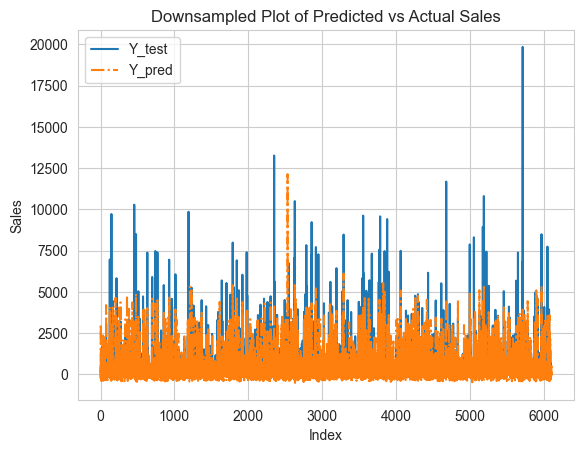

In [142]:
downsampling_factor = 100
downsampled_indices = range(0, len(Y_test_sales), downsampling_factor)

downsampled_Y_test = Y_test_sales[downsampled_indices]
downsampled_Y_pred = Y_pred[downsampled_indices]

plt.plot(downsampled_Y_test, label='Y_test')
plt.plot(downsampled_Y_pred, '-.', label='Y_pred')

plt.xlabel("Index")
plt.ylabel("Sales")
plt.legend()
plt.title('Downsampled Plot of Predicted vs Actual Sales')
plt.show()


In [107]:
Y_test

668753      471.000
1267004       1.000
997442        0.000
873596        0.000
756145        0.000
             ...   
475684      160.000
1322714       0.000
2965722    2009.000
1287101       2.000
936734       37.125
Name: sales, Length: 610870, dtype: float64

In [4]:
train_df.head()

id       date  store_nbr      family  sales  onpromotion
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0
1   1 2013-01-01          1   BABY CARE    0.0            0
2   2 2013-01-01          1      BEAUTY    0.0            0
3   3 2013-01-01          1   BEVERAGES    0.0            0
4   4 2013-01-01          1       BOOKS    0.0            0

In [7]:
sales_2013 = train_df.loc[pd.to_datetime(train_df['date']).dt.year==2013].groupby("store_nbr")['sales'].sum()
sales_2013.value_counts()

sales
0.000000e+00    7
1.894713e+06    1
2.267669e+06    1
2.391017e+06    1
9.631295e+05    1
2.115333e+06    1
2.877706e+06    1
1.010122e+06    1
1.277567e+06    1
2.835821e+06    1
2.752960e+06    1
2.657475e+06    1
1.984719e+06    1
1.728477e+06    1
2.114037e+06    1
8.327322e+06    1
7.098806e+06    1
6.241695e+06    1
6.727160e+06    1
5.331641e+06    1
4.185245e+06    1
4.382813e+06    1
4.726213e+06    1
1.018053e+06    1
2.417920e+06    1
2.865393e+06    1
1.726762e+06    1
6.462661e+06    1
2.611982e+06    1
2.579358e+06    1
3.546398e+06    1
3.283315e+06    1
3.997763e+06    1
4.026855e+06    1
1.673192e+06    1
4.569503e+06    1
1.630205e+06    1
1.472962e+06    1
1.950354e+06    1
1.784640e+06    1
1.926380e+06    1
2.334356e+06    1
1.970776e+06    1
1.830394e+06    1
1.945827e+06    1
3.708285e+06    1
1.663730e+06    1
1.530313e+06    1
Name: count, dtype: int64

In [15]:
#find when each store_nbr started haveing sales >0

opening_dates = train_df.loc[train_df.sales>0].groupby('store_nbr')['date'].min()

In [19]:
# create a new dataframe, without rows with store_nbr that have 0 sales until they open
#train_open_stores = train_df[train_df['date'] >= opening_dates]
filtered_train_df = pd.merge(train_df, opening_dates, on='store_nbr')
filtered_train_df = filtered_train_df.loc[filtered_train_df["date_x"] >= filtered_train_df["date_y"]]
#filtered_train_df.drop(columns="date_y")
filtered_train_df.shape

(2778831, 7)

In [8]:
#store_nbr 1 sales on training set

import plotly.express as px
fig = px.scatter(train_df[train_df.store_nbr==42], x="date", y="sales")
fig.show()